In [2]:
#Importing the required lib.
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#Initializing the training and validation generators
train_path = 'DataSet/train'
val_path = 'DataSet/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
#Building the convolution network architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [5]:
#Tarining the Model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])
model_history = model.fit(
    train_generator,
    steps_per_epoch=28709 // 64,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=7178 // 64)

Epoch 1/30
448/448 [==============================] - 608s 1s/step - loss: 1.8091 - accuracy: 0.2541 - val_loss: 1.7399 - val_accuracy: 0.3214
Epoch 2/30
448/448 [==============================] - 559s 1s/step - loss: 1.6345 - accuracy: 0.3607 - val_loss: 1.5385 - val_accuracy: 0.4203
Epoch 3/30
448/448 [==============================] - 426s 950ms/step - loss: 1.5199 - accuracy: 0.4123 - val_loss: 1.4480 - val_accuracy: 0.4457
Epoch 4/30
448/448 [==============================] - 408s 910ms/step - loss: 1.4485 - accuracy: 0.4480 - val_loss: 1.3910 - val_accuracy: 0.4697
Epoch 5/30
448/448 [==============================] - 590s 1s/step - loss: 1.3788 - accuracy: 0.4718 - val_loss: 1.3284 - val_accuracy: 0.4936
Epoch 6/30
448/448 [==============================] - 551s 1s/step - loss: 1.3277 - accuracy: 0.4959 - val_loss: 1.2953 - val_accuracy: 0.5060
Epoch 7/30
448/448 [==============================] - 543s 1s/step - loss: 1.2857 - accuracy: 0.5135 - val_loss: 1.2600 - val_accuracy: 

In [10]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


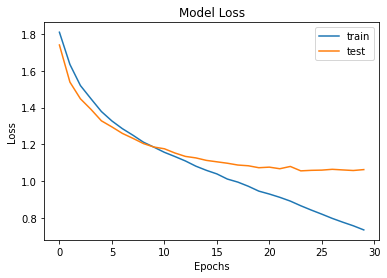

In [11]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()

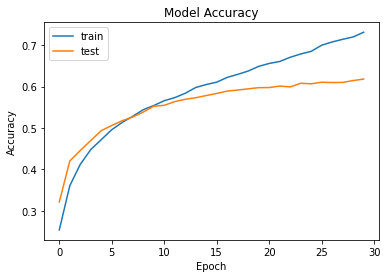

In [12]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
#Saving the Model Weight
model.save_weights('model.h5')